In [1]:
# Importing libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk
nltk.download(['stopwords',
              'punkt',
              'wordnet',
              'omw-1.4',
              'vader_lexicon'
              ])
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nicholas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
!pip install pandas nltk scikit-learn textblob


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Read the CSV file

df = pd.read_csv('Airline_review.csv')

In [4]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [5]:
df.tail()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,NaN,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,Tokyo to Los Angeles,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes
23170,23170,ZIPAIR,1,"""lost all of our money with no refund""",20th May 2022,True,They lied about connection in Narita and we ...,NaN,Solo Leisure,Economy Class,Singapore to Tokyo,May 2022,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no


In [6]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


In [7]:
# Drop rows with missing values
df = df.dropna()

In [8]:
print(df.isnull().sum())

Unnamed: 0                0
Airline Name              0
Overall_Rating            0
Review_Title              0
Review Date               0
Verified                  0
Review                    0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Ground Service            0
Inflight Entertainment    0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 5 to 23169
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1667 non-null   int64  
 1   Airline Name            1667 non-null   object 
 2   Overall_Rating          1667 non-null   object 
 3   Review_Title            1667 non-null   object 
 4   Review Date             1667 non-null   object 
 5   Verified                1667 non-null   bool   
 6   Review                  1667 non-null   object 
 7   Aircraft                1667 non-null   object 
 8   Type Of Traveller       1667 non-null   object 
 9   Seat Type               1667 non-null   object 
 10  Route                   1667 non-null   object 
 11  Date Flown              1667 non-null   object 
 12  Seat Comfort            1667 non-null   float64
 13  Cabin Staff Service     1667 non-null   float64
 14  Food & Beverages        1667 non-null  

In [10]:
df.describe(include = 'all')

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
count,1667.000000,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667
unique,NaN,265,9,1624,1000,2,1665,352,4,4,1554,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Emirates,1,"""I was pleasantly surprised""",14th June 2023,True,"Ravn Alaska is so frustrating. First off, your...",A320,Solo Leisure,Economy Class,Auckland to Singapore,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,33,716,3,11,1100,2,185,570,1162,6,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,906
mean,11366.272346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.943611,3.258548,2.748650,2.834433,2.560888,2.299940,2.895021,NaN
std,6751.369008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.511203,1.584280,1.570986,1.635497,1.558112,1.561087,1.618587,NaN
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,5997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,11277.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,NaN
75%,17301.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN


In [11]:
# Selectet Columns or creating a sub-dataframe
selected_columns_df = df[['Airline Name', 'Overall_Rating', 'Review Date', 'Review', 'Date Flown', 'Recommended']]
selected_columns_df.head()

,Airline Name,Overall_Rating,Review Date,Review,Date Flown,Recommended
5,Adria Airways,1,17th September 2019,Had very bad experience with rerouted and ca...,September 2019,no
7,Adria Airways,1,24th August 2019,"First of all, I am not complaining about a s...",August 2019,no
22,Adria Airways,8,27th January 2017,Ljubljana to Vienna. After a fast boarding p...,December 2016,yes
29,Adria Airways,6,4th September 2016,Booked this flight after many years using Easy...,September 2016,yes
113,Aegean Airlines,1,26th April 2023,Aegean Airlines will remain always my first ...,April 2023,yes


In [12]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# Assuming you have a DataFrame named selected_columns_df with a column named 'Review'

# Initialize the tokenizer and lemmatizer
tokenizer = RegexpTokenizer(r"[a-zA-Z0-9']+")
lemmatizer = WordNetLemmatizer()

# Tokenize and lemmatize the reviews
selected_columns_df['tokenized_Review'] = selected_columns_df['Review'].apply(lambda x: tokenizer.tokenize(x))
selected_columns_df['lemmatized_Review'] = selected_columns_df['tokenized_Review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

# Print the lemmatized reviews from the first row for demonstration
print(selected_columns_df['lemmatized_Review'].head())


C:\Users\Nicholas\AppData\Local\Temp\ipykernel_12180\3744375087.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['tokenized_Review'] = selected_columns_df['Review'].apply(lambda x: tokenizer.tokenize(x))


5      [Had, very, bad, experience, with, rerouted, a...
7      [First, of, all, I, am, not, complaining, abou...
22     [Ljubljana, to, Vienna, After, a, fast, boardi...
29     [Booked, this, flight, after, many, year, usin...
113    [Aegean, Airlines, will, remain, always, my, f...
Name: lemmatized_Review, dtype: object


C:\Users\Nicholas\AppData\Local\Temp\ipykernel_12180\3744375087.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['lemmatized_Review'] = selected_columns_df['tokenized_Review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [13]:
# Get English stopwords
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Remove stopwords from lemmatized reviews
selected_columns_df['tokenized_Review'] = selected_columns_df['lemmatized_Review'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Print the cleaned reviews from the first row for demonstration
# Printing the 'tokenized_Review' column from the DataFrame
print(selected_columns_df['tokenized_Review'].head())


5      [bad, experience, rerouted, cancelled, flight,...
7      [First, complaining, specific, flight, Lufthan...
22     [Ljubljana, Vienna, fast, boarding, procedure,...
29     [Booked, flight, many, year, using, Easyjet, g...
113    [Aegean, Airlines, remain, always, first, choi...
Name: tokenized_Review, dtype: object


C:\Users\Nicholas\AppData\Local\Temp\ipykernel_12180\4172189064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['tokenized_Review'] = selected_columns_df['lemmatized_Review'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])


In [15]:
selected_columns_df['lemmatized_Review'] = selected_columns_df['tokenized_Review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
print(selected_columns_df['lemmatized_Review'].head())

5      [bad, experience, rerouted, cancelled, flight,...
7      [First, complaining, specific, flight, Lufthan...
22     [Ljubljana, Vienna, fast, boarding, procedure,...
29     [Booked, flight, many, year, using, Easyjet, g...
113    [Aegean, Airlines, remain, always, first, choi...
Name: lemmatized_Review, dtype: object


C:\Users\Nicholas\AppData\Local\Temp\ipykernel_12180\2514073592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['lemmatized_Review'] = selected_columns_df['tokenized_Review'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])


In [16]:
selected_columns_df.head()

,Airline Name,Overall_Rating,Review Date,Review,Date Flown,Recommended,tokenized_Review,lemmatized_Review
5,Adria Airways,1,17th September 2019,Had very bad experience with rerouted and ca...,September 2019,no,"[bad, experience, rerouted, cancelled, flight,...","[bad, experience, rerouted, cancelled, flight,..."
7,Adria Airways,1,24th August 2019,"First of all, I am not complaining about a s...",August 2019,no,"[First, complaining, specific, flight, Lufthan...","[First, complaining, specific, flight, Lufthan..."
22,Adria Airways,8,27th January 2017,Ljubljana to Vienna. After a fast boarding p...,December 2016,yes,"[Ljubljana, Vienna, fast, boarding, procedure,...","[Ljubljana, Vienna, fast, boarding, procedure,..."
29,Adria Airways,6,4th September 2016,Booked this flight after many years using Easy...,September 2016,yes,"[Booked, flight, many, year, using, Easyjet, g...","[Booked, flight, many, year, using, Easyjet, g..."
113,Aegean Airlines,1,26th April 2023,Aegean Airlines will remain always my first ...,April 2023,yes,"[Aegean, Airlines, remain, always, first, choi...","[Aegean, Airlines, remain, always, first, choi..."


In [17]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer


# This process calculates sentiment scores for each review using VADER, allowing analysis based on the intensity and
# polarity of sentiments expressed in the text.

# Assuming df['lemmatized_reviews'] contains lists of lemmatized words
# Convert each list to a string

selected_columns_df['lemmatized_Review'] = selected_columns_df['lemmatized_Review'].apply(' '.join)

# Initialize the SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the lemmatized reviews
selected_columns_df['compound'] = [sentiment.polarity_scores(Review)['compound'] for Review in selected_columns_df['lemmatized_Review']]
selected_columns_df['neg'] = [sentiment.polarity_scores(Review)['neg'] for Review in selected_columns_df['lemmatized_Review']]
selected_columns_df['neu'] = [sentiment.polarity_scores(Review)['neu'] for Review in selected_columns_df['lemmatized_Review']]
selected_columns_df['pos'] = [sentiment.polarity_scores(Review)['pos'] for Review in selected_columns_df['lemmatized_Review']]


C:\Users\Nicholas\AppData\Local\Temp\ipykernel_12180\3522739116.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['lemmatized_Review'] = selected_columns_df['lemmatized_Review'].apply(' '.join)
C:\Users\Nicholas\AppData\Local\Temp\ipykernel_12180\3522739116.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['compound'] = [sentiment.polarity_scores(Review)['compound'] for Review in selected_columns_df['lemmatized_Review']]
C:\Users\Nicholas\AppData\Local\Temp\ipyk

In [18]:
# View the 'compound', 'neg', 'neu', 'pos' columns

print(selected_columns_df[['compound', 'neg', 'neu', 'pos']].head())

     compound    neg    neu    pos
5     -0.5267  0.147  0.734  0.120
7     -0.8622  0.202  0.663  0.135
22     0.9729  0.036  0.621  0.343
29     0.4284  0.062  0.846  0.093
113    0.9691  0.000  0.475  0.525


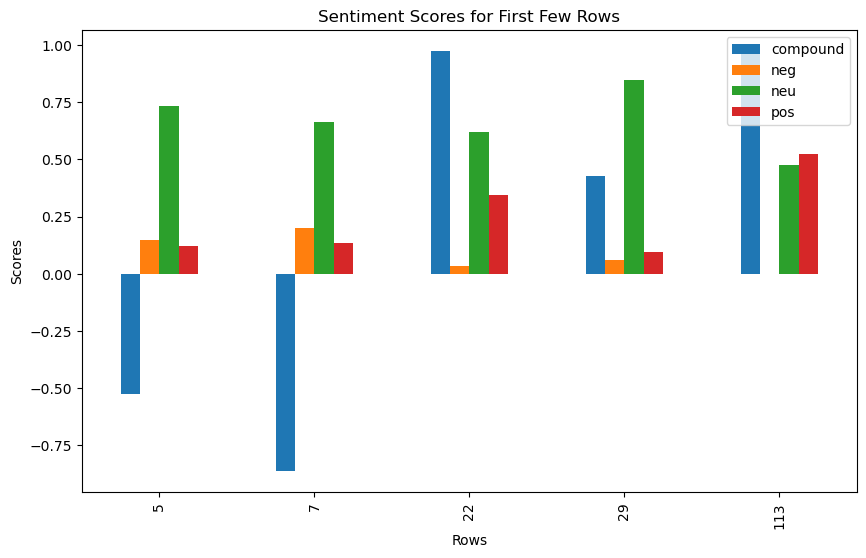

In [19]:
import matplotlib.pyplot as plt

# Assuming selected_columns_df contains the columns 'compound', 'neg', 'neu', 'pos'
# Plotting the first few rows of these columns
selected_columns_df[['compound', 'neg', 'neu', 'pos']].head().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Rows')
plt.ylabel('Scores')
plt.title('Sentiment Scores for First Few Rows')
plt.legend(loc='upper right')
plt.show()


In [20]:
selected_columns_df[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,1667.000000,1667.000000,1667.000000,1667.000000
mean,0.319452,0.104924,0.694650,0.200423
std,0.732330,0.089905,0.107684,0.129541
min,-0.988200,0.000000,0.265000,0.000000
25%,-0.468200,0.036000,0.629500,0.104500
50%,0.735100,0.090000,0.703000,0.176000
75%,0.943750,0.155500,0.768000,0.277000
max,0.998300,0.528000,1.000000,0.668000


# The median compound score is 0.73, meaning that  means that over 50% of the reviews have a compound score of more than 0.73  Furthermore, It appears that all the scores are positive except the minimum Compound Score, with -0.46.

<Axes: xlabel='compound', ylabel='Count'>

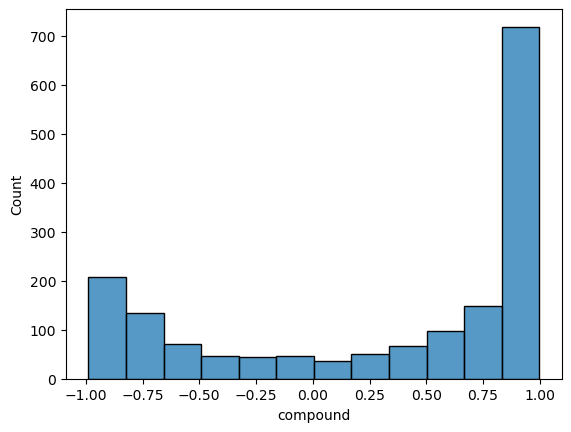

In [21]:
sns.histplot(selected_columns_df['compound'])

<Axes: xlabel='neg', ylabel='Count'>

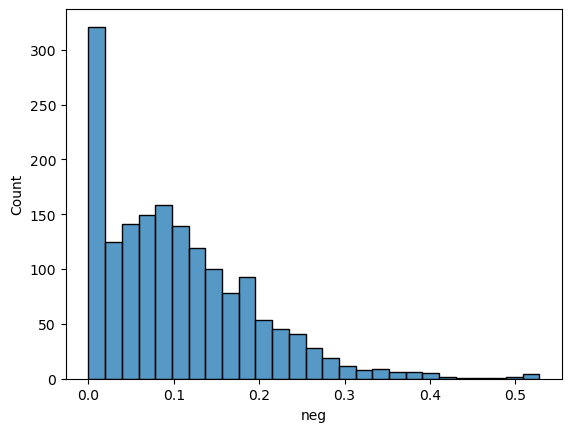

In [22]:
sns.histplot(selected_columns_df['neg'])

<Axes: xlabel='neu', ylabel='Count'>

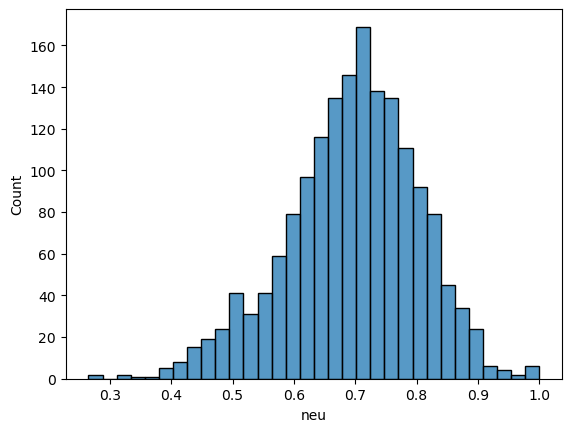

In [23]:
sns.histplot(selected_columns_df['neu'])

<Axes: xlabel='pos', ylabel='Count'>

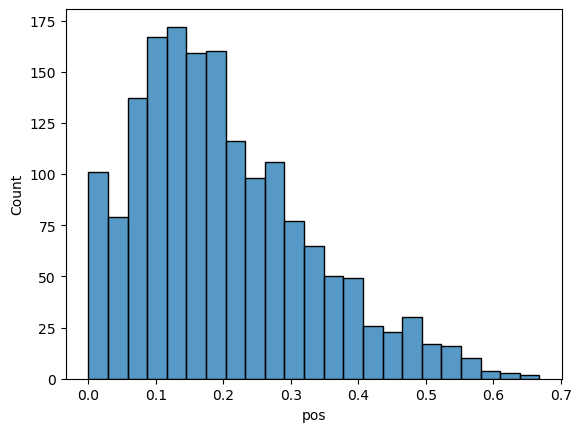

In [24]:
sns.histplot(selected_columns_df['pos'])

 # Doing sentiment analysis, It one should be interested in  understanding how sentiment varies across different products, brands or businesses.

# Lets look at how Negative Review Affects the Vairous Types of Ariline

In [25]:
(selected_columns_df['compound']<-0).groupby(selected_columns_df['Airline Name']).sum()

Airline Name
ANA All Nippon Airways       1
Adria Airways                2
Aegean Airlines              1
Aer Lingus                   9
Aeroflot Russian Airlines    1
                            ..
bmi Regional                 1
easyJet                      4
euroAtlantic Airways         1
flyadeal                     1
flydubai                     3
Name: compound, Length: 265, dtype: int64

In [26]:
percent_negative = pd.DataFrame((selected_columns_df['compound'] < 0).groupby(selected_columns_df['Airline Name']).sum()
                                  / selected_columns_df['Airline Name'].groupby(df['Airline Name']).count() * 100,
                                  columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
Airline Name,
PLAY,0.0
Azerbaijan Airlines,0.0
Avior Airlines,0.0
Hainan Airlines,0.0
Sky Airline,0.0
...,...
Air Tanzania,100.0
AirAsia X,100.0
Blue Air,100.0


<Axes: xlabel='% negative reviews', ylabel='Airline Name'>

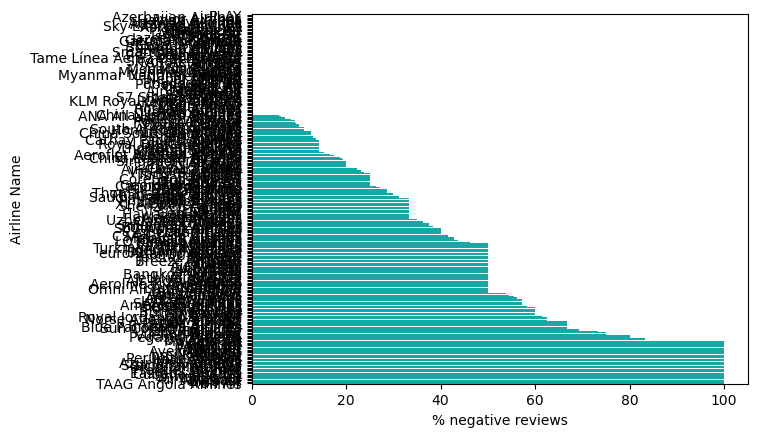

In [27]:
sns.barplot(data=percent_negative, x = '% negative reviews', y=percent_negative.index, color = 'c')

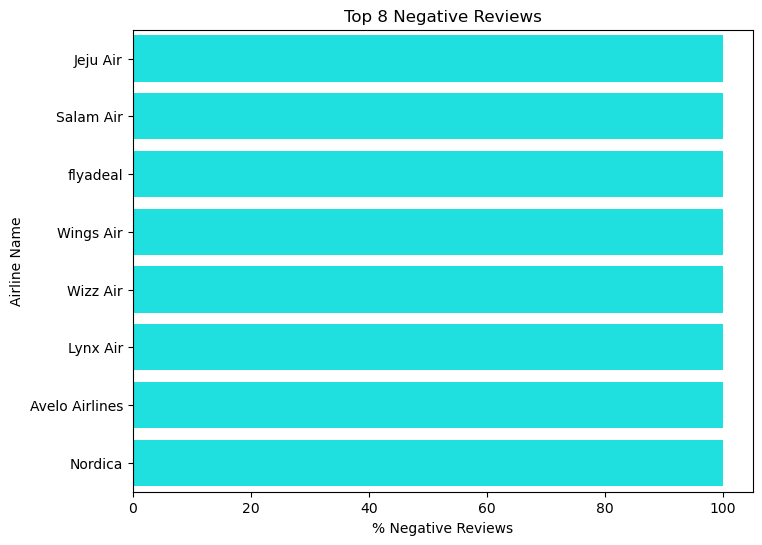

In [28]:
# Assuming you have a percent_negative DataFrame

# Selecting the top 8 negative reviews
top_8_negative = percent_negative.nlargest(8, '% negative reviews')

# Create a bar plot for the top 8 negative reviews
plt.figure(figsize=(8, 6))
sns.barplot(data=top_8_negative, x='% negative reviews', y=top_8_negative.index, color='cyan')
plt.xlabel('% Negative Reviews')
plt.ylabel('Airline Name')
plt.title('Top 8 Negative Reviews')
plt.show()


In [29]:
percent_positive = pd.DataFrame((selected_columns_df['compound'] > 0).groupby(selected_columns_df['Airline Name']).sum()
                                  / selected_columns_df['Airline Name'].groupby(df['Airline Name']).count() * 100,
                                  columns=['% positive reviews']).sort_values(by='% positive reviews')
print(percent_positive)

                   % positive reviews
Airline Name                         
Jeju Air                          0.0
Peruvian Airlines                 0.0
Sichuan Airlines                  0.0
Bangkok Airways                   0.0
Avelo Airlines                    0.0
...                               ...
Belavia                         100.0
Mahan Air                       100.0
Bamboo Airways                  100.0
TAG Airlines                    100.0
StarFlyer                       100.0

[265 rows x 1 columns]


<Axes: xlabel='% positive reviews', ylabel='Airline Name'>

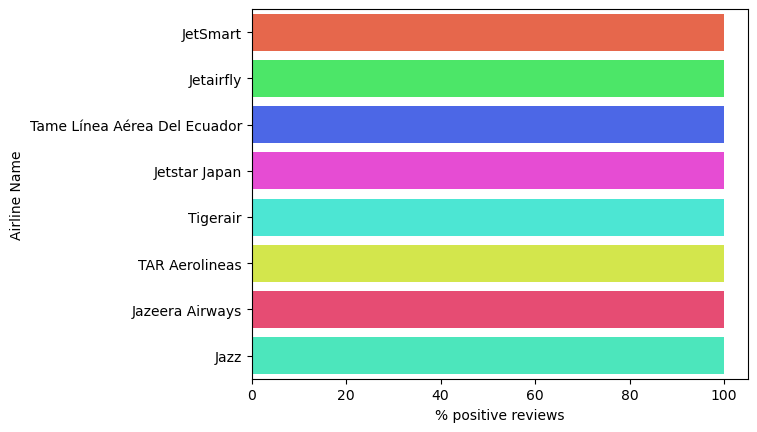

In [30]:
top_positive_8 = percent_positive.nlargest(8, '% positive reviews')

# Define a custom color palette for positive reviews
custom_positive_palette = ['#FF5733', '#33FF57', '#3357FF', '#FF33E6', '#33FFE6', '#E6FF33', '#FF3366', '#33FFC7']

# Create a bar plot using Seaborn for the top positive reviews
sns.barplot(data=top_positive_8, x='% positive reviews', y=top_positive_8.index, palette=custom_positive_palette)


# Most Frequent in Positve and Negative Review 


In [31]:
# Metadata Extraction

# Display the metadata fields
metadata = selected_columns_df[['Airline Name', 'lemmatized_Review', 'Overall_Rating', 'Review Date']]
metadata

,Airline Name,lemmatized_Review,Overall_Rating,Review Date
5,Adria Airways,bad experience rerouted cancelled flight last ...,1,17th September 2019
7,Adria Airways,First complaining specific flight Lufthansa fr...,1,24th August 2019
22,Adria Airways,Ljubljana Vienna fast boarding procedure plane...,8,27th January 2017
29,Adria Airways,Booked flight many year using Easyjet got flig...,6,4th September 2016
113,Aegean Airlines,Aegean Airlines remain always first choice fav...,1,26th April 2023
...,...,...,...,...
23027,XL Airways France,wa pleasantly surprised XL Airways critical re...,7,11th June 2017
23125,ZIPAIR,small bottle water 2 Cup coffee 4 certainly ea...,8,14th June 2023
23136,ZIPAIR,impressed seat marketed Business Class 'Lite' ...,9,28th April 2023
23152,ZIPAIR,wa first time ZipAir wa bit leery flying far b...,9,11th November 2022


# Process the dataset ready for cloudword

In [32]:
review_positive_subset = selected_columns_df.loc[(selected_columns_df['Airline Name']== 'ZIPAIR') & (selected_columns_df['compound']>0), :]
reviews_negative_subset = selected_columns_df.loc[(selected_columns_df['Airline Name']== 'Nordica') & (selected_columns_df['compound']<0), :]


# Negative Review

In [33]:
reviews_negative_subset

,Airline Name,Overall_Rating,Review Date,Review,Date Flown,Recommended,tokenized_Review,lemmatized_Review,compound,neg,neu,pos
15146,Nordica,1,6th January 2021,I had a business trip from Hamburg to Stockh...,June 2020,no,"[business, trip, Hamburg, Stockholm, hated, fl...",business trip Hamburg Stockholm hated flight c...,-0.0018,0.154,0.671,0.175


# Positive Review

In [34]:
review_positive_subset

,Airline Name,Overall_Rating,Review Date,Review,Date Flown,Recommended,tokenized_Review,lemmatized_Review,compound,neg,neu,pos
23125,ZIPAIR,8,14th June 2023,A small bottle of water is $2. Cup of coffee...,May 2023,yes,"[small, bottle, water, 2, Cup, coffee, 4, cert...",small bottle water 2 Cup coffee 4 certainly ea...,0.9806,0.039,0.706,0.255
23136,ZIPAIR,9,28th April 2023,Very impressed. These seats are marketed as B...,April 2023,yes,"[impressed, seat, marketed, Business, Class, '...",impressed seat marketed Business Class 'Lite' ...,0.9933,0.016,0.662,0.322
23152,ZIPAIR,9,11th November 2022,It was my first time with ZipAir and I was a...,November 2022,yes,"[wa, first, time, ZipAir, wa, bit, leery, flyi...",wa first time ZipAir wa bit leery flying far b...,0.9921,0.020,0.696,0.284
23169,ZIPAIR,6,23rd May 2022,Zipair is JAL’s budget airline. They don’t ha...,May 2022,yes,"[Zipair, JAL, budget, airline, class, travel, ...",Zipair JAL budget airline class travel pick se...,0.9927,0.044,0.786,0.170


# Negative CloudWord

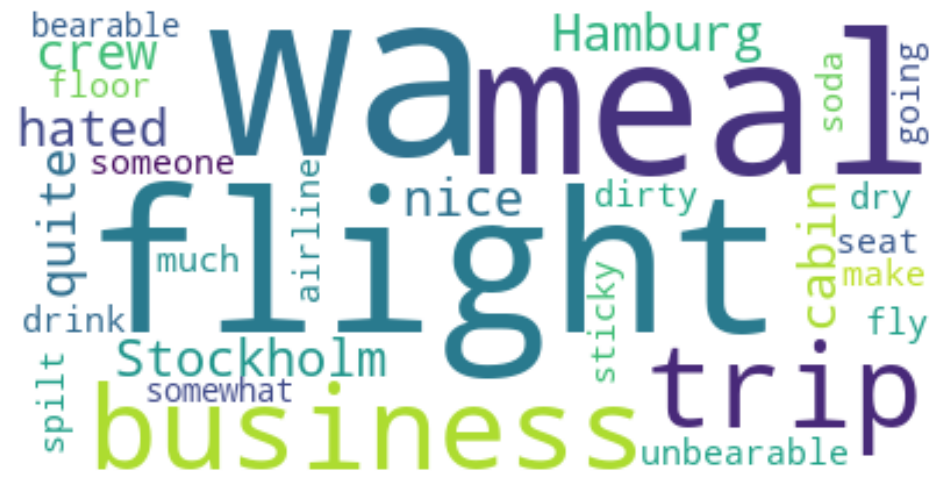

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have 'processed_reviewDescribe' column for processed text in negative reviews
# Assuming 'reviews_negative_subset' contains the negative reviews DataFrame

# Extracting tokens from the processed_reviewDescribe column in negative reviews
neg_tokens = [word for review in reviews_negative_subset['lemmatized_Review'] for word in review.split()]

# Generating word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(neg_tokens))

# Display the generated Image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Positive CloudWord

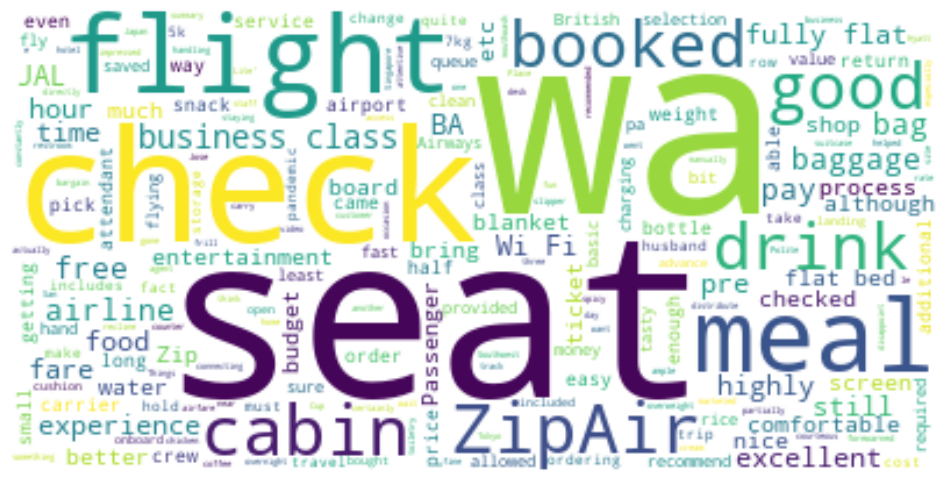

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Extracting tokens from the Lemmatized_Riview column in positive reviews
pos_tokens = [word for review in review_positive_subset['lemmatized_Review'] for word in review.split()]

# Generating word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(pos_tokens))

# Display the generated Image
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# use of the nltk freqDist and Tablated form

In [53]:
from nltk.probability import FreqDist

In [54]:
# Function to get frequency distribution
def get_freq_dist(tokens):
    return FreqDist(tokens)

# Extracting tokens for positive reviews of ZIPAIR
pos_tokens = [word for review in review_positive_subset['lemmatized_Review'] for word in review.split()]

# Extracting tokens for negative reviews of Nordica
neg_tokens = [word for review in reviews_negative_subset['lemmatized_Review'] for word in review.split()]

# Positive 

In [67]:
# Getting frequency distributions for each product
pos_freqdist = get_freq_dist(pos_tokens)

In [69]:
# Displaying top 10 most common words for each product
print("Top 10 most common words for ZIPAIR:")
print(pos_freqdist.most_common(10))

Top 10 most common words for ZIPAIR:
[('wa', 27), ('seat', 20), ('flight', 10), ('meal', 9), ('check', 8), ('class', 7), ('cabin', 7), ('drink', 6), ('flat', 6), ('business', 6)]


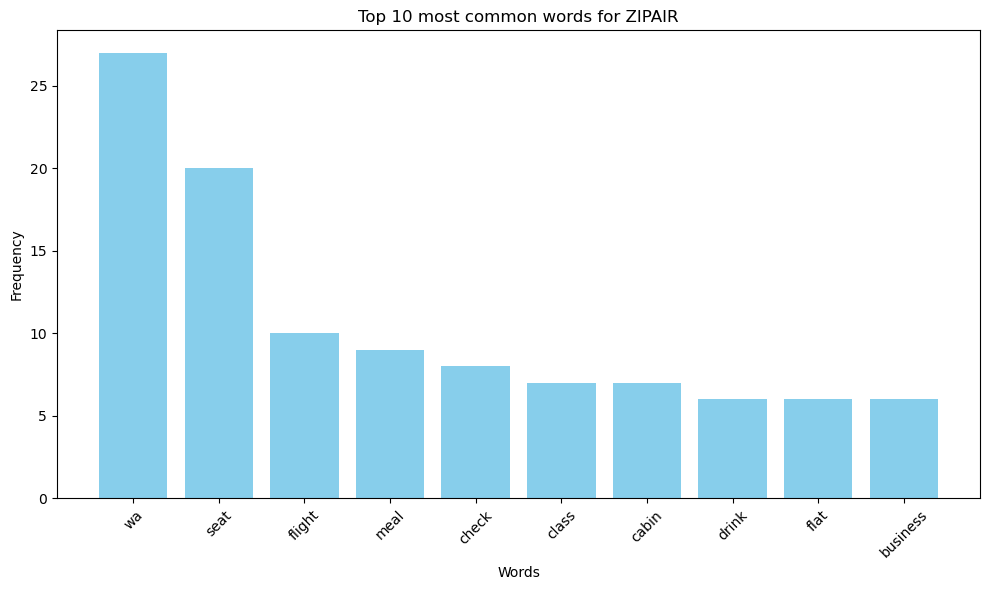

In [72]:
import matplotlib.pyplot as plt
top_words = pos_freqdist.most_common(10)
words, frequencies = zip(*top_words)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 most common words for ZIPAIR')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


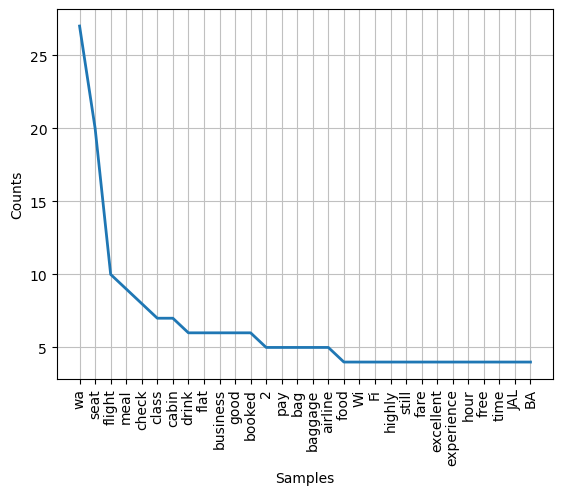

<Axes: xlabel='Samples', ylabel='Counts'>

In [73]:
pos_freqdist.plot(30)

# Negative

In [74]:
# Getting frequency distributions for each product
neg_freqdist = get_freq_dist(neg_tokens)

In [75]:
# Displaying top 10 most common words for each product
print("Top 10 most common words for Nordica:")
print(neg_freqdist.most_common(10))

Top 10 most common words for Nordica:
[('wa', 3), ('flight', 2), ('like', 2), ('meal', 2), ('business', 1), ('trip', 1), ('Hamburg', 1), ('Stockholm', 1), ('hated', 1), ('cabin', 1)]


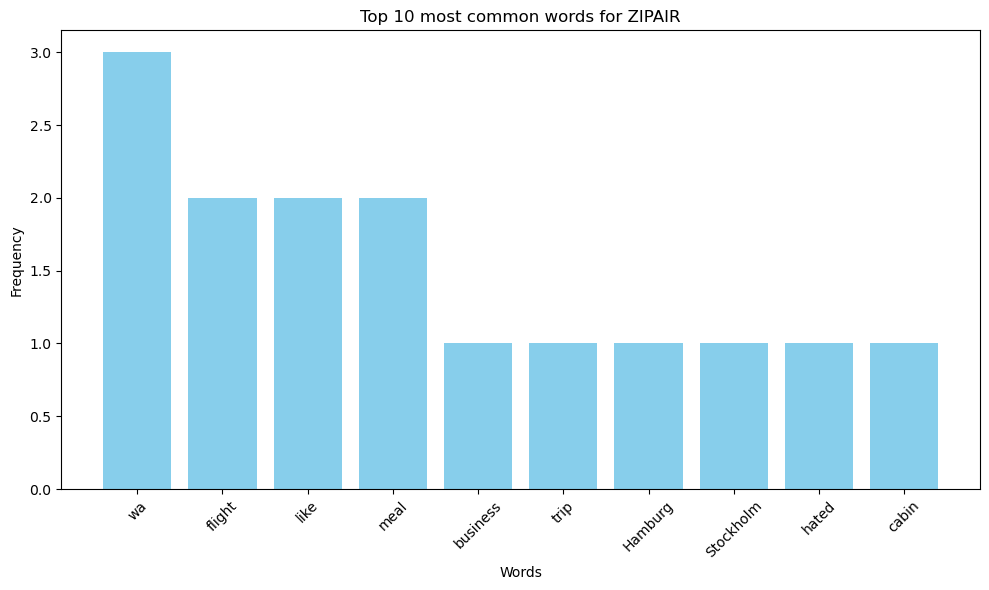

In [76]:
top_words = neg_freqdist.most_common(10)
words, frequencies = zip(*top_words)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 most common words for ZIPAIR')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


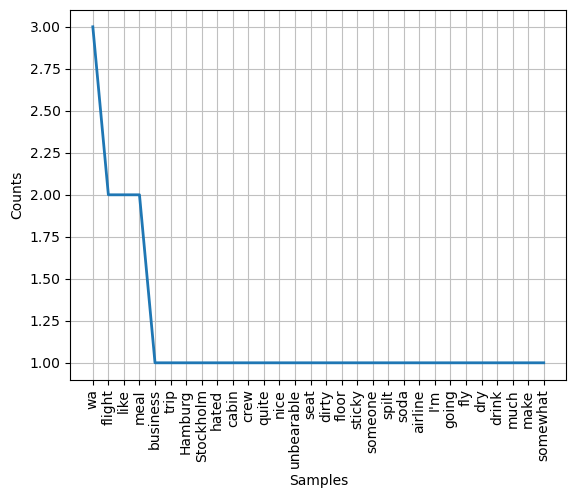

<Axes: xlabel='Samples', ylabel='Counts'>

In [77]:
neg_freqdist.plot(30)